## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


## Loading the dataset

In [34]:
data = pd.read_csv("Restaurant_Reviews.tsv", sep = "\t")
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


## Input and Target

In [4]:
inputs = data["Review"]
target = data["Liked"]


In [6]:
target.value_counts(normalize = True)

,proportion
Liked,
1,0.5
0,0.5


## Splitting the data

In [41]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42, stratify = target)

## Vectorization of text data

In [8]:
vectorizer = CountVectorizer()

x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [11]:
x_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
x_test_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
x_train_vec.shape

(800, 1778)

In [16]:
x_test_vec.shape

(200, 1778)

## Model

In [17]:
model = MultinomialNB()
model.fit(x_train_vec, y_train)
model.get_params(0)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [19]:
y_test_pred = model.predict(x_test_vec)

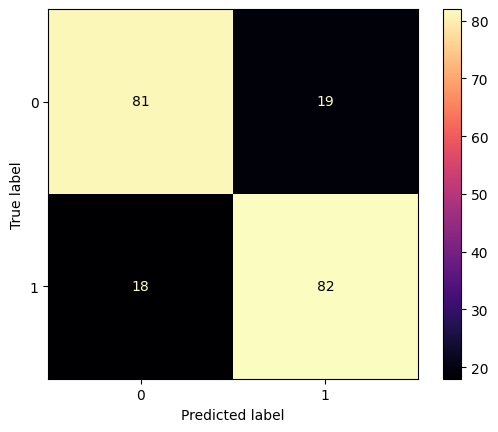

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels = model.classes_, cmap = "magma")

In [21]:
print(classification_report(y_test, y_test_pred, target_names = ["Not liked","Liked"]))

              precision    recall  f1-score   support

   Not liked       0.82      0.81      0.81       100
       Liked       0.81      0.82      0.82       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



## Predictions

In [22]:
predict_data = vectorizer.transform(["Taste is horrible","The food is heavenly"])

In [58]:
predict_data.shape

(2, 1778)

In [23]:
model.predict(predict_data)

array([0, 1])

## Removing stopwords to see if there will be any improvement

In [29]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
print(stopwords.words("english"))
from nltk import word_tokenize

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
stop_words = set(stopwords.words("english"))

## Converting data to lower case

In [35]:
data_copy = data
data_copy['Review'] = data_copy['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_copy['Review'].head()

,Review
0,wow... loved this place.
1,crust is not good.
2,not tasty and the texture was just nasty.
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


## Removing punctuation

In [36]:
data_copy['Review'] = data_copy['Review'].str.replace('[^\w\s]','')
data['Review'].head()

,Review
0,wow... loved this place.
1,crust is not good.
2,not tasty and the texture was just nasty.
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


## Removing stopwords

In [38]:
data_copy['Review'] = data_copy['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
data_copy['Review'].head()

,Review
0,wow... loved place.
1,crust good.
2,tasty texture nasty.
3,stopped late may bank holiday rick steve recom...
4,selection menu great prices.


In [39]:
inputs_new = data_copy["Review"]
target_new = data_copy["Liked"]

In [42]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(inputs_new, target_new, test_size = 0.2, random_state = 42, stratify = target_new)

In [44]:
x_train_new_vec = vectorizer.fit_transform(x_train_new)
x_test_new_vec = vectorizer.transform(x_test_new)

In [45]:
model_new = MultinomialNB()
model_new.fit(x_train_new_vec, y_train_new)
model_new.get_params(0)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [47]:
y_test_new_pred = model_new.predict(x_test_new_vec)

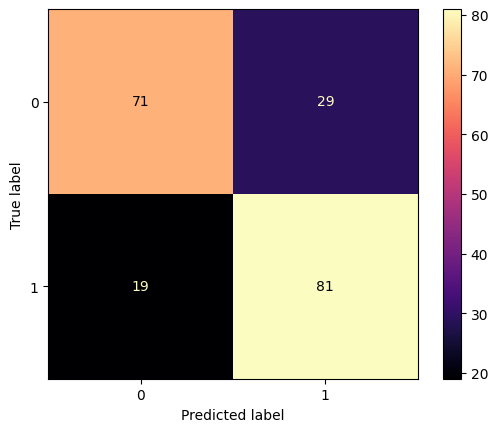

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test_new, y_test_new_pred, cmap = "magma")

In [51]:
print(classification_report(y_test_new, y_test_new_pred, target_names = ["Not liked","Liked"]))

              precision    recall  f1-score   support

   Not liked       0.79      0.71      0.75       100
       Liked       0.74      0.81      0.77       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



The performance is dropped after removing the stopwords, punctuation from the data. Removing them is not that useful in this case.

## Predictions from new model

In [61]:
predict_data_new = vectorizer.transform(["wow this is heavenly","there is unusual smell"])
model_new.predict(predict_data_new)

array([1, 0])

In [62]:
predict_data_new.shape

(2, 1711)